## Shopify Data Science Challenge

Hi! This is my data science intern submission. Responses to the first question are outlined below right beside the data to tell a story. For the second question's SQL queries, scroll to the bottom. 

### Question 1

First, let's read in the data.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./dataset.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Some basic stats about the data. Looks like the average order value (AOV) of 3145.13 matches up with the question. We immediately see that the max value is way higher than every percentile shown.

In [14]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Plotting the whole thing doesn't really help; we have a very few extreme outliers messing up the data that we can barely see near the 700,000 mark.

<Figure size 1200x640 with 0 Axes>

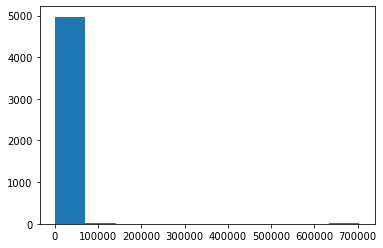

<Figure size 1200x640 with 0 Axes>

In [16]:
from matplotlib import pyplot as plt

df["order_amount"] = pd.to_numeric(df["order_amount"])
order_amounts = df["order_amount"]

plt.hist(order_amounts)
plt.figure(figsize=(15, 8), dpi=80)

So let's change the window to everything bigger than 1000 and see if that improves the view. It does!

<Figure size 960x480 with 0 Axes>

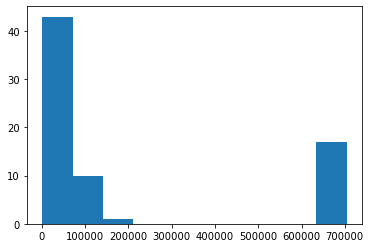

<Figure size 960x480 with 0 Axes>

In [17]:
order_amounts = df[df["order_amount"] > 1000]["order_amount"]
plt.hist(order_amounts)
plt.figure(figsize=(12, 6), dpi=80)

Looks like we have some extreme skew, which we could have told immediately from the fact that the mean is way bigger than the median (50% in the first table). Using the median gives a better measure of central tendency, and is more immune to skewness. Of course, the mean gives you useful properties (such as for calculating total revenue), but in this case we want to give vendors an idea of the typical customer and not a mathematical tool. The median value is 284.

### Question 2

Below are the queries and their values:

SELECT COUNT(*) FROM Orders;

**196**

SELECT LastName FROM Employees WHERE EmployeeID=(SELECT TOP 1 EmployeeID FROM Orders GROUP BY EmployeeID ORDER BY COUNT(*) DESC)

**Peacock**

SELECT TOP 1 ProductID FROM ((Orders INNER JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID) INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID) WHERE Country="Germany" GROUP BY ProductID ORDER BY COUNT(ProductID) DESC;

**31** (To get the product name, you need another JOIN or WHERE clause on the Product table. The product name is Gorgonzola Telino if that's what the question wanted.)

## Thanks for reading, excited to hear back!